<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Classification_Error_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error Analysis on Multiclass Classification


## Pull Data

In [4]:
#pull mnist data from open_ml repo

from sklearn.datasets import fetch_openml

In [9]:
mnist = fetch_openml('mnist_784', as_frame=False) #fetch the data as arrays instead of DataFrames

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
X = mnist['data']
y = mnist['target']

numpy.ndarray

In [11]:
X_train, y_train, X_test, y_test = X[:60000,:], y[:60000], X[60000:,:], y[60000:]

## Stochastic Gradient Descent (SGD) Classifier

In [12]:
#import the SGD classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier() #capable of handling multiclass natively

In [15]:
#train model on 3 folds
from sklearn.model_selection import cross_val_score, cross_val_predict

In [18]:
sgd_clf_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

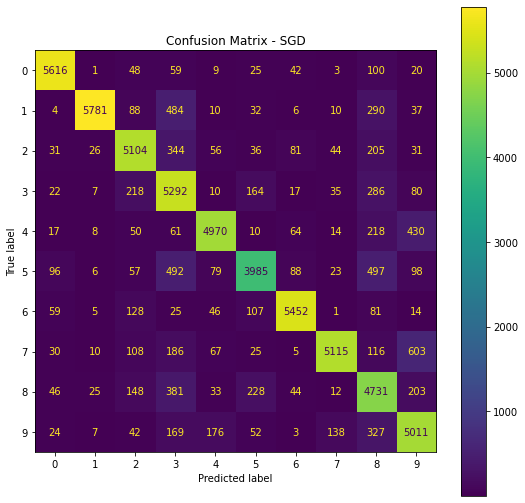

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

sgd_clf_conf = confusion_matrix(y_train, sgd_clf_pred)


fig, axs = plt.subplots(figsize=(9,9))
#ax.matshow(sgd_clf_conf)
axs.set_title('Confusion Matrix - SGD')
#plt.show()

disp = ConfusionMatrixDisplay(sgd_clf_conf)
disp.plot(ax=axs)
plt.show()